In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns

## Homework4 EDA

### Basic filtering, transforming and exploring of data 

In [12]:
path = 'datasets'

In [13]:
df = pd.read_csv("/".join((path, 'flights.csv')), low_memory=True,\
                 dtype={'TAIL_NUMBER': str, 'ORIGIN_AIRPORT': str,'DESTINATION_AIRPORT': str,
                       })

In [14]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df_mask = df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)
df = df.loc[~df_mask]
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


Notice that a lot of airports are unsignificant, coded by digits, and real airports are coded by 3 latin uppercase letters

In [15]:
df['ORIGIN_AIRPORT'].unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'DFW', 'MKE', 'IAH',
       'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'PHL', 'SBN', 'EUG', 'IAD',
       'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT', 'SMF', 'AUS', 'MCI',
       'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA', 'SAT', 'CHS', 'SBA',
       'IND', 'CLE', 'GSP', 'BDL', 'RIC', 'BFL', 'OMA', 'RDM', 'FLL',
       'CID', 'TPA', 'SYR', 'ROC', 'TYR', 'LAN', 'GSO', 'EWR', 'PBI',
       'RSW', 'OAK', 'PVD', 'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'TUL',
       'LGA', 'LIT', 'MSY', 'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT',
       'SAV', 'CLT', 'GRB', 'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX',
       'CWA', 'TTN', 'RDU', 'CVG', 'BHM', 'ACY', 'DTW', 'RAP', 'TUS',
       'EAU', 'DLH', 'FSD', 'INL', 'SPI', 'CLD', 'COD', 'CMH', 'PSC',
       'CPR', 'ACV', 'DAL', 'PAH', 'MRY', 'ESC', 'ISN', 'PSP', 'CAE',
       'STL', 'BTV',

In [16]:
df['DESTINATION_AIRPORT'].unique()

array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'LAS',
       'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW', 'SAN',
       'RIC', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP', 'BUR', 'DAL',
       'CVG', 'SMF', 'RDU', 'BNA', 'AUS', 'DSM', 'BOI', 'ELP', 'TUS',
       'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP', 'MKE', 'JNU', 'CMH',
       'CLD', 'KTN', 'CAK', 'CLE', 'GPT', 'IND', 'SAT', 'SRQ', 'BTV',
       'CHS', 'DAY', 'TUL', 'SAV', 'COS', 'GJT', 'BZN', 'PUB', 'HRL',
       'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'ACY', 'LBB', 'JAC', 'BIL',
       'EUG', 'ASE', 'TVC', 'MTJ', 'OKC', 'PVD', 'HSV', 'CDC', 'GSO',
       'YUM', 'ABQ', 'TLH', 'EGE', 'BTR', 'MOB', 'FWA', 'BIS', 'MFR',
       'APN', 'BHM',

Let's delete them from original dataset

In [17]:
import re

def is_valid_three_letter_string(s):
    'regex for 3 latin uppercase string'
    pattern = r'^[A-Z]{3}$'
    return bool(re.fullmatch(pattern, s))

In [18]:
df = df.drop(df[~df['ORIGIN_AIRPORT'].apply(is_valid_three_letter_string)\
             & ~df['DESTINATION_AIRPORT'].apply(is_valid_three_letter_string)]\
             .index)

### Hypothesis 1. Check the time of day

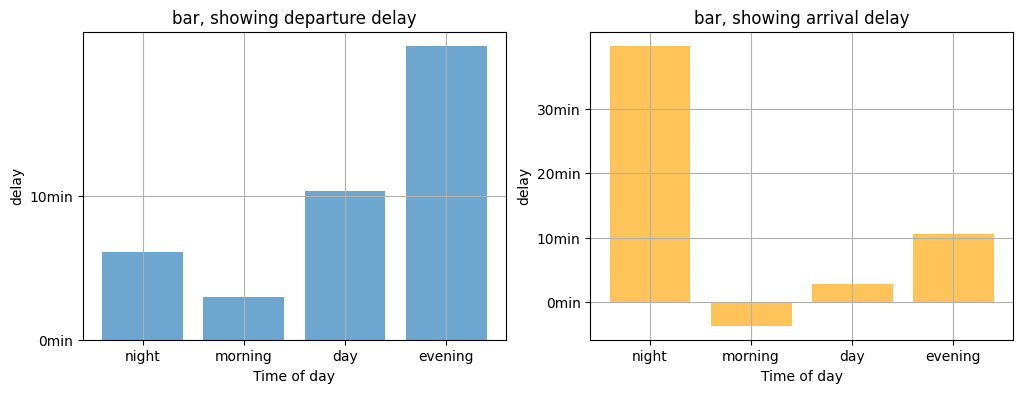

In [19]:
df["TIME_OF_DAY_DEP"] = pd.cut(df['DEPARTURE_TIME']/100, bins=[0, 6, 12, 18, 24], labels=["night", 'morning', 'day', 'evening'])
df["TIME_OF_DAY_ARR"] = pd.cut(df['ARRIVAL_TIME']/100, bins=[0, 6, 12, 18, 24], labels=["night", 'morning', 'day', 'evening'])

a1 = df.groupby('TIME_OF_DAY_DEP', observed=True)['DEPARTURE_DELAY'].mean()
a2 = df.groupby('TIME_OF_DAY_ARR', observed=True)['ARRIVAL_DELAY'].mean()
# print(a1.min())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.bar(a1.index, a1, alpha = 0.65)
ax1.set_xlabel('Time of day')
ax1.set_yticks(range(0, int(a1.max()), 10), labels = [str(i)+"min" for i in range(0, int(a1.max()), 10) ])
# ax1.legend(loc='upper right')
ax1.set_ylabel('delay')
ax1.set_title('bar, showing departure delay')
ax1.grid()
ax2.bar(a2.index, a2, alpha = 0.65, color = 'orange')
ax2.set_xlabel('Time of day')
ax2.set_yticks(range(0, int(a2.max()), 10), labels = [str(i)+"min" for i in range(0, int(a2.max()), 10) ])
# ax1.legend(loc='upper right')
ax2.set_ylabel('delay')
ax2.set_title('bar, showing arrival delay')
ax2.grid()

As we may observe, bigger time of delays occurs during night and evening shifts.

Possible problem: not enough nightshift employees

Possible solution: hire more stuff, both on airlines and airports  

### Hypothesis 2. Check the month

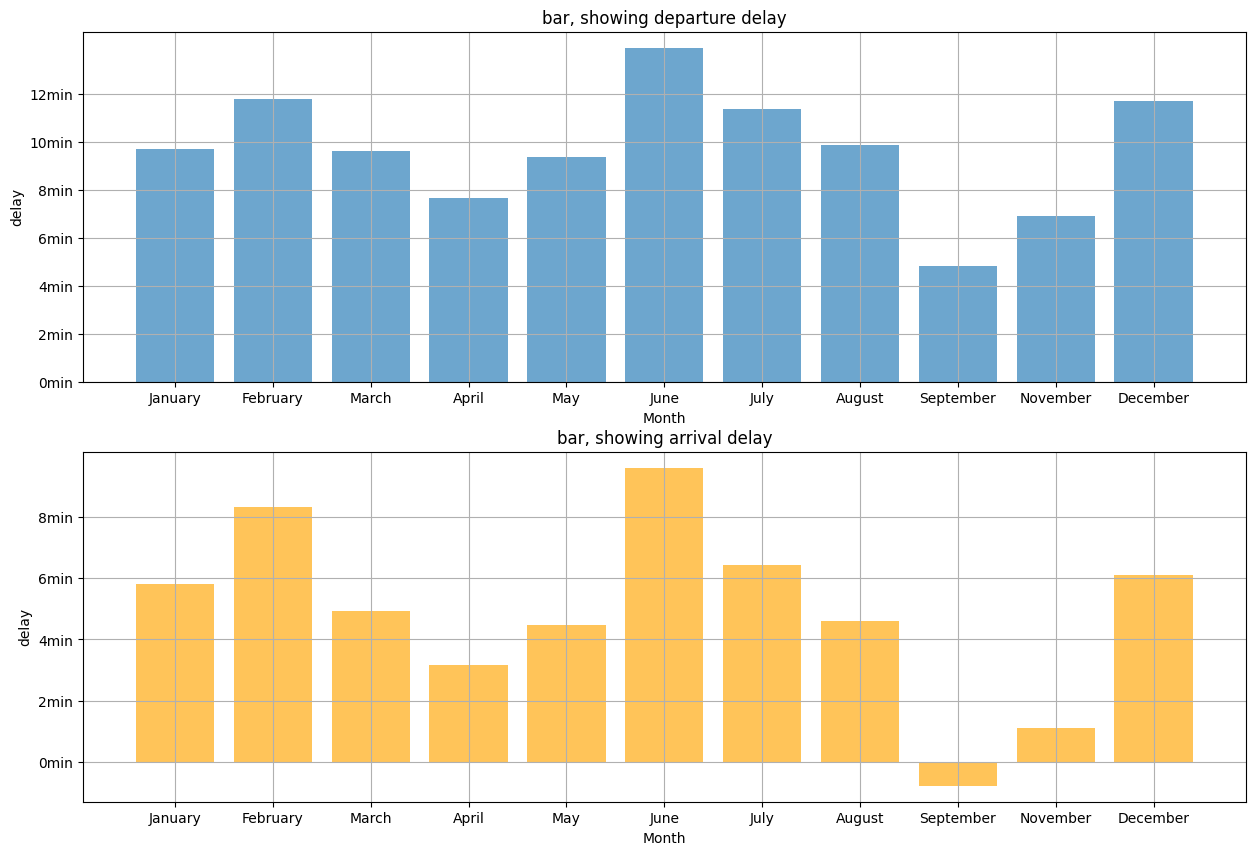

In [20]:
df["MONTH_DELAY"] = pd.cut(df['MONTH'], bins=list(range(0,13)),\
                               labels=["January", "February", "March", "April",\
                                       "May", "June", "July", "August", "September", "October", "November", "December"])

a1 = df.groupby('MONTH_DELAY', observed=True)['DEPARTURE_DELAY'].mean()
a2 = df.groupby('MONTH_DELAY', observed=True)['ARRIVAL_DELAY'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.bar(a1.index, a1, alpha = 0.65)
ax1.set_xlabel('Month')
ax1.set_yticks(range(0, int(a1.max()), 2), labels = [str(i)+"min" for i in range(0, int(a1.max()), 2) ])
# ax1.legend(loc='upper right')
ax1.set_ylabel('delay')
ax1.set_title('bar, showing departure delay')
ax1.grid()
ax2.bar(a2.index, a2, alpha = 0.65, color = 'orange')
ax2.set_xlabel('Month')
ax2.set_yticks(range(0, int(a2.max()), 2), labels = [str(i)+"min" for i in range(0, int(a2.max()), 2) ])
# ax1.legend(loc='upper right')
ax2.set_ylabel('delay')
ax2.set_title('bar, showing arrival delay')
ax2.grid()

As we may observe, more delays occur during summer and winter monthes.

Possible problems:

- More people are on vacations
- Maintenance problems during extra cold or extra hot temperatures

Possible solutions: 
- Expand the flights
- Expand the maintenance personal staff

### Hypothesis 3. Check the airports

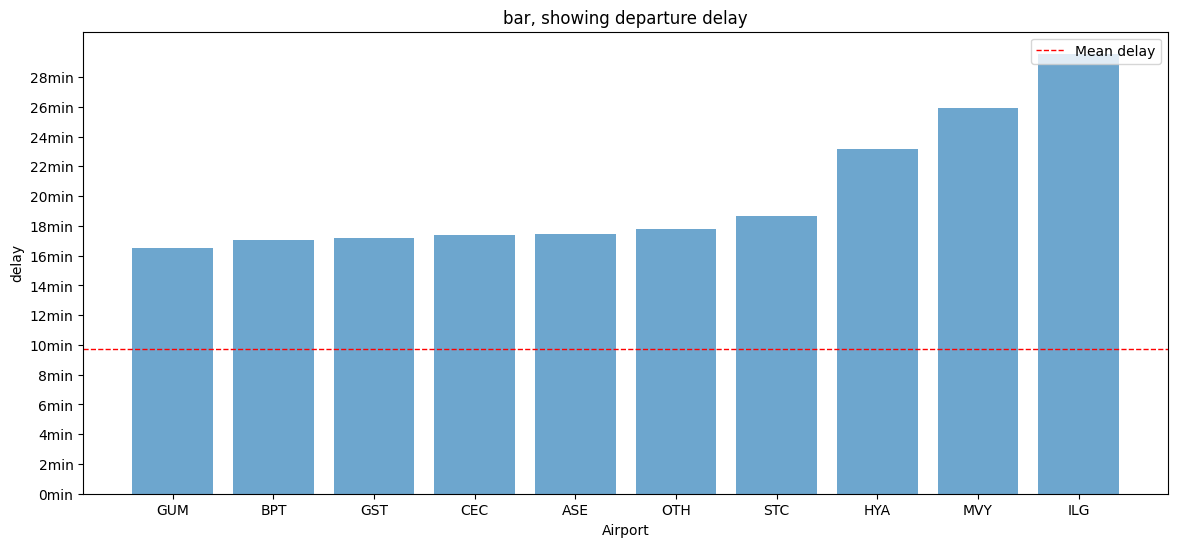

In [22]:
t1 = df.groupby('ORIGIN_AIRPORT', observed=True)['DEPARTURE_DELAY'].mean()
# a2 = df.groupby('DESTINATION_AIRPORT', observed=True)['ARRIVAL_DELAY'].mean()
w1 = t1.sort_values()
a1 = w1.iloc[-10::]
# a2 = a2.sort_values()
mean1 = df['DEPARTURE_DELAY'].mean()
fig, (ax1) = plt.subplots(1, 1, figsize=(14,6))
ax1.bar(a1.index, a1, alpha = 0.65)
ax1.set_xlabel('Airport')
ax1.axhline(y = mean1, color='red', ls = '--', linewidth=1, label = 'Mean delay')
ax1.set_yticks(range(0, int(a1.max()), 2), labels = [str(i)+"min" for i in range(0, int(a1.max()), 2) ])
ax1.legend(loc='upper right')
ax1.set_ylabel('delay')
ax1.set_title('bar, showing departure delay')
None
# ax1.grid()
# ax2.bar(a2.index, a2, alpha = 0.65, color = 'orange')
# ax2.set_xlabel('Airport')
# ax2.set_yticks(range(0, int(a2.max()), 2), labels = [str(i)+"min" for i in range(0, int(a2.max()), 2) ])
# # ax1.legend(loc='upper right')
# ax2.set_ylabel('delay')
# ax2.set_title('bar, showing arrival delay')
# ax2.grid()

As we may observe in top 20 airports (by departure delays), delay is at least 5 min above the norm, and in ILG it's 20 min above the mean

Possible problem is a bad management in this airports

Possible solution: change of administration


#### Also lets try to draw airports on map 

In [25]:
dfAirP = pd.read_csv("/".join((path, 'airports.csv')), low_memory=True)
# newAir = t1.merge(dfAirP, on='IATA_CODE')

In [26]:
t2 = w1.reset_index()
t2.columns = ["ORIGIN_AIRPORT", "MEAN_DELAY"]

In [27]:
newAirP = t2.merge(dfAirP, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

In [28]:
import folium

In [29]:

filtAIRP = newAirP[newAirP['LATITUDE'].notna() & newAirP['LONGITUDE'].notna()]
m = folium.Map(location=[40, -90], zoom_start=5)

#if map doesnt appear in github, then open notebook in jupyter or collab
for index, row in filtAIRP.iterrows():
    # print(row["AIRPORT"])
    if row.MEAN_DELAY < mean1:
        color1 = 'green'
    elif row.MEAN_DELAY > 1.5*mean1:
        color1 = 'red'
    else:
        color1 = 'orange'
    folium.Marker(location = [row['LATITUDE'], row['LONGITUDE']],
                 icon = folium.Icon(color = color1, icon = 'plane', prefix ='fa'), tooltip = row['AIRPORT'], 
                 popup = f"delay: {round(row['MEAN_DELAY'], 2)} mins").add_to(m)
m

### Hypothesis 4. Check the airlines 

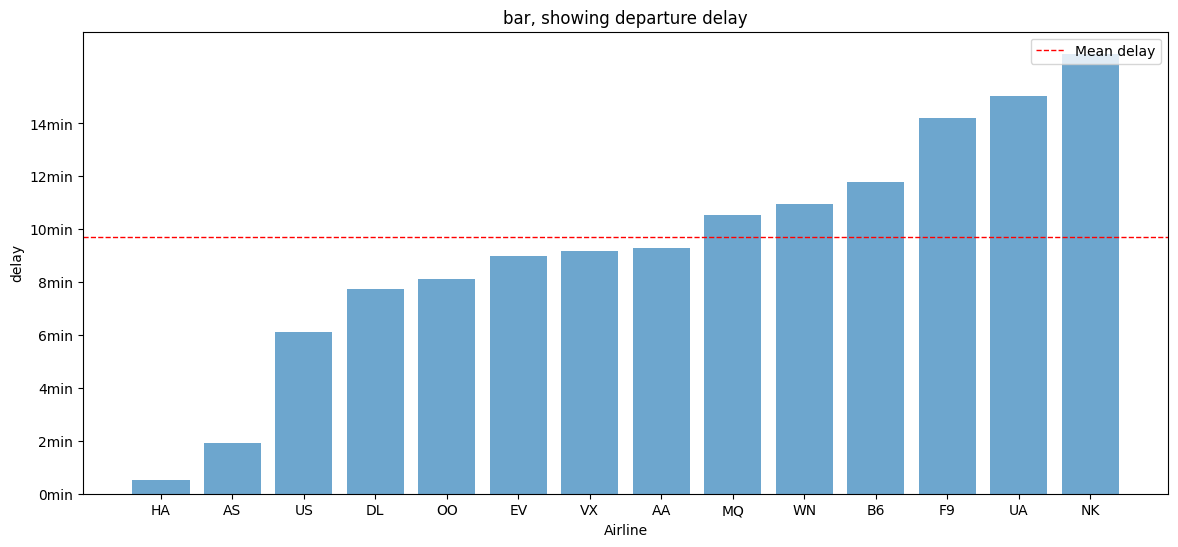

In [30]:
t1 = df.groupby('AIRLINE', observed=True)['DEPARTURE_DELAY'].mean()
w1 = t1.sort_values()
a1 = w1
# a2 = a2.sort_values()
mean2 = df['DEPARTURE_DELAY'].mean()
fig, (ax1) = plt.subplots(1, 1, figsize=(14,6))
ax1.bar(a1.index, a1, alpha = 0.65)
ax1.set_xlabel('Airline')
ax1.axhline(y = mean2, color='red', ls = '--', linewidth=1, label = 'Mean delay')
ax1.set_yticks(range(0, int(a1.max()), 2), labels = [str(i)+"min" for i in range(0, int(a1.max()), 2) ])
ax1.legend(loc='upper right')
ax1.set_ylabel('delay')
ax1.set_title('bar, showing departure delay')
None

As we may observe, NK, UA, F9, B6 airlines are above average delays.

Possible Problem: bad management, condition of aircrafts, inner problems which require a deeper research of each company

Possible Solution: separate investigation in this airlines



### Hypothesis 5. Reasearch of canceled flights

In [31]:
df = pd.read_csv("/".join((path, 'flights.csv')), low_memory=True,\
                 dtype={'TAIL_NUMBER': str, 'ORIGIN_AIRPORT': str,'DESTINATION_AIRPORT': str,
                       }) #need to get fresh data, prev is corrupted by all of the tranformation

In [32]:
a1 = df.groupby('AIRLINE')['CANCELLED'].mean()
a2 = df.groupby('AIRLINE')['CANCELLED'].mean().sort_values(ascending=False).iloc[:8]

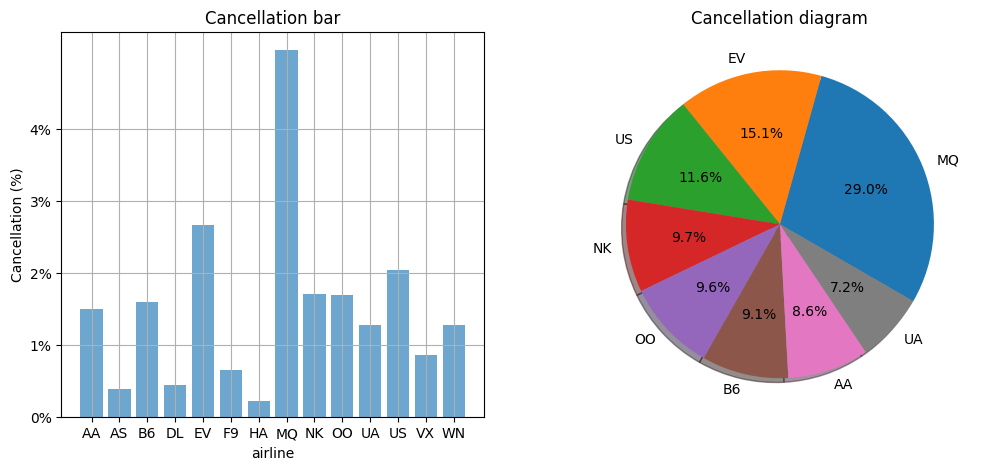

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.bar(a1.index, a1*100, alpha = 0.65)
ax1.set_xlabel('airline')
ax1.set_yticks(range(0, int(a1.max()*100), 1), labels = [str(i)+"%" for i in range(0, int(a1.max()*100), 1) ])
# ax1.legend(loc='upper right')
ax1.set_ylabel('Cancellation (%)')
ax1.set_title('Cancellation bar')
ax1.grid()
ax2.pie(a2.values, labels=a2.index, autopct='%1.1f%%',
       shadow=True, startangle=-30,
       )
None
ax2.set_title('Cancellation diagram')
ax2.grid()

As we may observe MQ(American Eagle Airlines Inc) has the biggest cancelation rate

Lets look deeper in cancelation reasons of MQ Airlines.

In [34]:
df_mq = df.loc[df["AIRLINE"]=="MQ"]
df['CANCELLED'] = df['CANCELLED'].astype(int)
df_mq =df_mq[df_mq['CANCELLED'] ==1 ]

In [35]:
df_mq[['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].notna().sum(axis = 0)
df_mq['CANCELLATION_REASON'].unique()
cancelled = df_mq.groupby('CANCELLATION_REASON').size()
cancelled

CANCELLATION_REASON
A    2475
B    9164
C    3385
D       1
dtype: int64

Here we can see that more than a half of cancellations is reason "B".
As I read in some ugly forum, it's the weather condition cancellation.

Possible Solution:  
- Avoid bad weather areas,

- buy weatherproof aircrafts